In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:
plt.rcParams["figure.figsize"] = (15,8) #set size of plot
plt.rcParams.update({'font.size': 22})

In [7]:
os.chdir('/home/MA')

In [8]:
total_elec_load = pd.read_pickle('Calculations/Hawaii/load_hawaii.pkl')

In [9]:
PV_production = pd.read_pickle('Calculations/Hawaii/PV_production_Hawaii.pkl')

In [10]:
power_balance = pd.DataFrame()

In [11]:
power_balance['consumption'] = total_elec_load

In [12]:
power_balance['from PV'] = PV_production

In [13]:
power_balance['exchange grid'] = PV_production - total_elec_load

In [14]:
power_balance['to Grid'] = (PV_production - total_elec_load).clip(lower=0)

In [15]:
power_balance['from Grid'] = (total_elec_load - PV_production).clip(lower=0)

In [16]:
power_balance = power_balance.fillna(0)

In [17]:
power_balance.head(10)

consumption   from PV  exchange grid   to Grid  from Grid
month day hour                                                           
1     1   1        0.786791  0.000000      -0.786791  0.000000   0.786791
          2        0.628323  0.000000      -0.628323  0.000000   0.628323
          3        0.572563  0.000000      -0.572563  0.000000   0.572563
          4        0.562988  0.000000      -0.562988  0.000000   0.562988
          5        0.597533  0.000000      -0.597533  0.000000   0.597533
          6        0.810968  0.000000      -0.810968  0.000000   0.810968
          7        1.312868  0.000000      -1.312868  0.000000   1.312868
          8        1.695824  1.198663      -0.497160  0.000000   0.497160
          9        1.631542  2.624480       0.992939  0.992939   0.000000
          10       1.436625  3.194487       1.757862  1.757862   0.000000

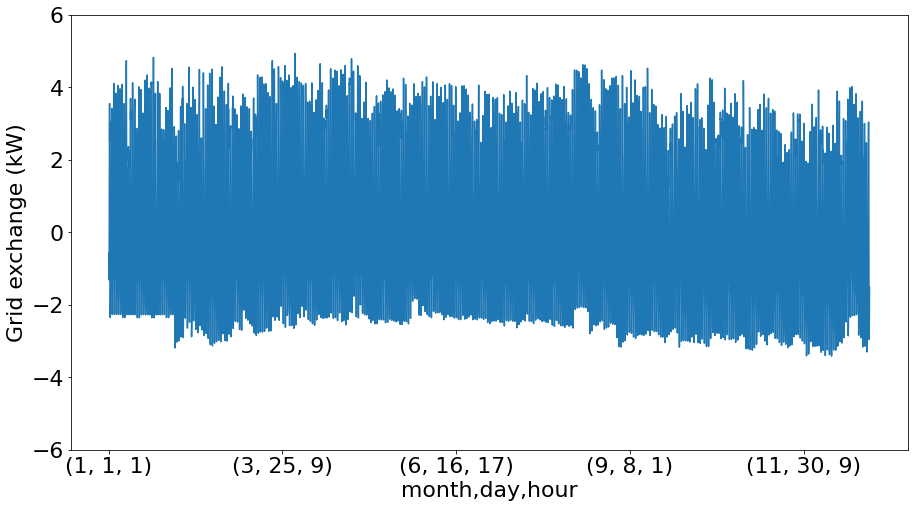

In [18]:
power_balance['exchange grid'].plot(ylabel = 'Grid exchange (kW)', ylim = ([-6, 6]));

In [19]:
power_balance.to_pickle('Calculations/Hawaii/power_balance_hawaii.pkl')

**No storage calculations**

Self-consumption share

In [20]:
sum(power_balance['consumption'] - power_balance['from Grid'])/sum(power_balance['from PV'])

0.4798140368143962

Curtailment calculation

In [21]:
sum(power_balance['to Grid'])/sum(power_balance['from PV'])

0.5201859631856034

PV share without storage

In [22]:
sum(power_balance['consumption'] - power_balance['from Grid'])/sum(power_balance['consumption'])

0.4406558352311871